# Hough Transform
- In image space, a line is plotted as x vs. y and modeld as y = mx+b or $x \cos\theta  + y\sin\theta = \rho $
- In parameter space (hough), a line is represented by a point in "m vs. b"
- Each line is represented as a single point with (m, b) coordinates or $(\rho, \theta)$ parameters
- THe Hough Line Transform in open CV is cv2.HoughLines() is used to detect straight lines
- lines = cv2.HoughLines(image, $\rho $ accuracy, $\theta\$ accuracy, threshod )
- lines = cv2.HoughLines(image, 1, np.pi/180, 240)

- To apply the Transform, first apply Canny edge detection pre-processing
- lines: A vector that will store the parameters $(\rho, \theta)$ of the detected lines
- $\rho $: The resolution of parameter $\rho$ in pixels
- $\theta $: The resolution of the parameter $\theta$ in radians
- Threshold: The minimuum number of intersections to "detect" a line (minimum vote to be considered a line)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
image_c = cv2.imread('calendar.png')
cv2.imshow('Given Image', image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()

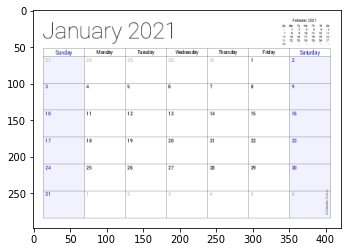

In [19]:
plt.imshow(image_c)

In [20]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
image_canny = cv2.Canny(image_g, 50, 200, apertureSize = 3)
image_canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
cv2.imshow('canny image', image_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

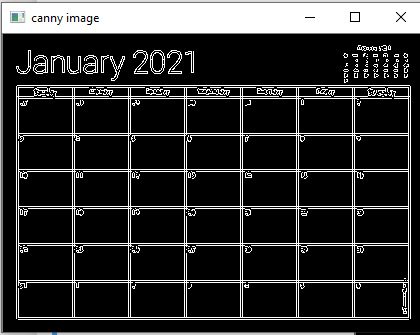

In [24]:
# rho accuracy of 1 pixwel and theta accuracy of np.pi/180 (1 degrree)
# threshold is number of points on line
# Try 300, 400, 500
lines = cv2.HoughLines(image_canny, 1, np.pi/180, 300)

In [25]:
lines

array([[[ 51.       ,   1.5707964]],

       [[ 99.       ,   1.5707964]],

       [[135.       ,   1.5707964]],

       [[172.       ,   1.5707964]],

       [[209.       ,   1.5707964]],

       [[283.       ,   1.5707964]],

       [[246.       ,   1.5707964]],

       [[285.       ,   1.5707964]],

       [[ 64.       ,   1.5707964]],

       [[248.       ,   1.5707964]],

       [[101.       ,   1.5707964]],

       [[137.       ,   1.5707964]],

       [[211.       ,   1.5707964]],

       [[174.       ,   1.5707964]],

       [[ 62.       ,   1.5707964]],

       [[ 53.       ,   1.5707964]]], dtype=float32)

In [26]:
len(lines)

16

In [27]:
lines.shape

(16, 1, 2)

In [ ]:
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        
        x0 = rho*np.cos(theta)
        y0 = rho*np.sin(theta)
        
        a = np.cos(theta)
        b = np.sin(theta)
        
        x1 = int(x0+10000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 -1000*(a))
        cv2.line(image_c, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
cv2.imshow('Hough Line', image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()